In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['car_data', 'anno_test.csv', 'names.csv', 'anno_train.csv']


### Imports and setting up workspace

In [24]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [25]:
from fastai import *
from fastai.vision import *

### Input the kaggle dataset

In [26]:
# Load data. Return a path object.
img_dir='../input/car_data/car_data/train'
path=Path(img_dir)

### Getting the databunch object

**Note:** `valid_pct` set because validation folder not present in the dataset. Throws error if not set and validation folder not found. See [source code.](https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L102)

In [27]:
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, 
                                  ds_tfms=get_transforms(), 
                                   size=224, bs=34, num_workers=0)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Ferrari California Convertible 2012,Ferrari California Convertible 2012,Ferrari California Convertible 2012,Ferrari California Convertible 2012,Ferrari California Convertible 2012
Path: ../input/car_data/car_data/train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Spyker C8 Convertible 2009,Buick Verano Sedan 2012,Acura Integra Type R 2001,Honda Odyssey Minivan 2007,AM General Hummer SUV 2000
Path: ../input/car_data/car_data/train;

Test: None

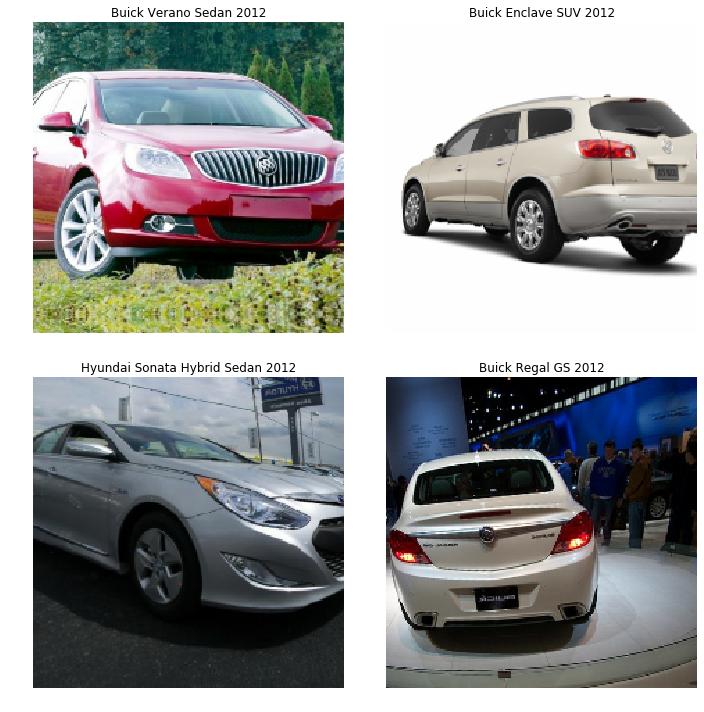

In [28]:
data.show_batch(rows=2, figsize=(10,10))

In [29]:
# Class names
data.classes

['AM General Hummer SUV 2000',
 'Acura Integra Type R 2001',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi A5 Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi S4 Sedan 2007',
 'Audi S4 Sedan 2012',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S6 Sedan 2011',
 'Audi TT Hatchback 2011',
 'Audi TT RS Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi V8 Sedan 1994',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3 SUV 2012',
 'BMW X5 SUV 2007',
 'BMW X6

In [30]:
len(data.classes)

196

### Training with resnet34

In [31]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, model_dir='/tmp/models')

In [32]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.897090,3.986645,0.858108,04:11
1,3.537249,2.849766,0.670147,04:15
2,2.761003,2.361165,0.570025,04:15
3,2.298062,2.262285,0.546069,04:11


### Interpreting results

In [33]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

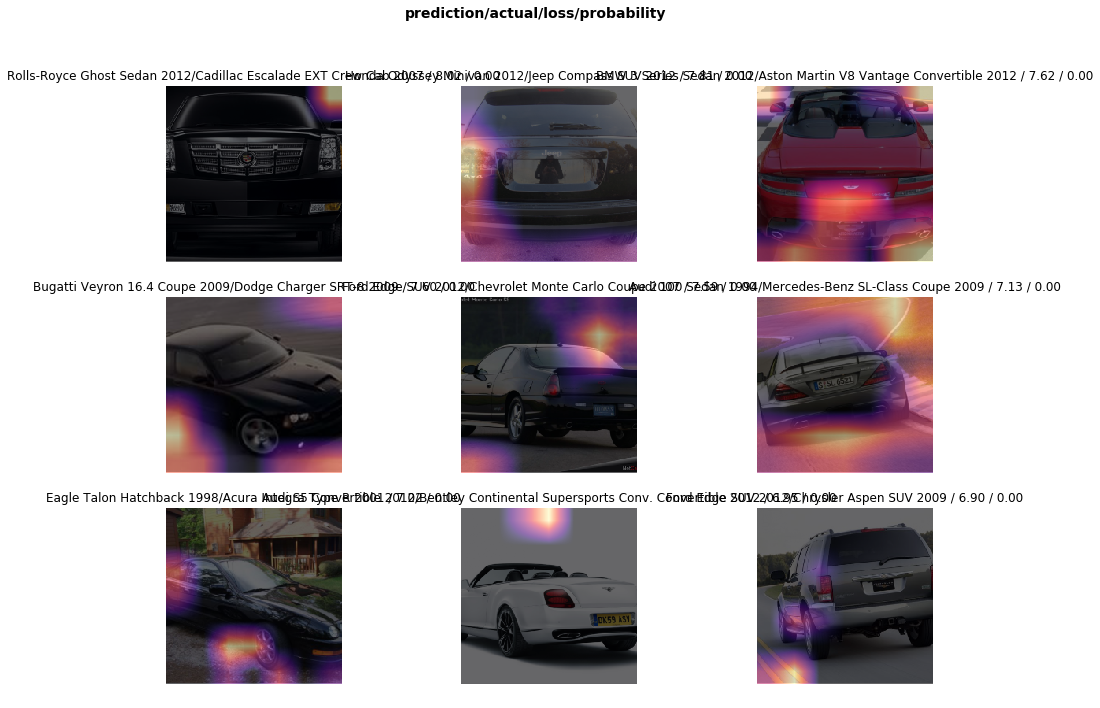

In [34]:
interp.plot_top_losses(9, figsize=(15,11))

In [35]:
interp.most_confused(min_val=3)

[('Ferrari 458 Italia Convertible 2012',
  'Ferrari California Convertible 2012',
  6),
 ('Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
  'Chevrolet Silverado 1500 Extended Cab 2012',
  4),
 ('Jeep Liberty SUV 2012', 'Jeep Patriot SUV 2012', 4),
 ('Rolls-Royce Phantom Drophead Coupe Convertible 2012',
  'Rolls-Royce Phantom Sedan 2012',
  4),
 ('Suzuki Aerio Sedan 2007', 'Ford Focus Sedan 2007', 4),
 ('Audi 100 Sedan 1994', 'Audi V8 Sedan 1994', 3),
 ('Audi TT Hatchback 2011', 'Audi TTS Coupe 2012', 3),
 ('BMW 3 Series Sedan 2012', 'Mercedes-Benz C-Class Sedan 2012', 3),
 ('Chevrolet Malibu Sedan 2007', 'Chevrolet Impala Sedan 2007', 3),
 ('Chrysler 300 SRT-8 2010', 'Rolls-Royce Phantom Sedan 2012', 3),
 ('Dodge Caravan Minivan 1997', 'Honda Odyssey Minivan 2007', 3),
 ('Fisker Karma Sedan 2012', 'BMW M6 Convertible 2010', 3),
 ('Ford F-150 Regular Cab 2007',
  'Chevrolet Silverado 1500 Extended Cab 2012',
  3),
 ('Ford F-150 Regular Cab 2012', 'Ford F-150 Regular Cab 2007', 3),
 ('

In [36]:
learn.save('stage-1')

### Unfreezing, fine-tuning, and learning rates

In [37]:
learn.unfreeze()

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


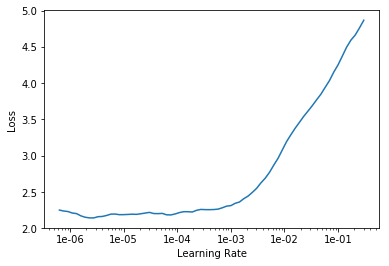

In [39]:
learn.recorder.plot()

In [40]:
# from the above plot, train again
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-06, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,2.164792,2.061769,0.512285,04:18
1,1.919914,1.695551,0.438575,04:19
2,1.510546,1.435499,0.371007,04:21
3,1.212541,1.315301,0.348280,04:23
4,1.055164,1.295510,0.342752,04:23


### Training with resnet50

**Question:** Why I want to `do_flip=True`, which is default behavior [according to docs](https://docs.fast.ai/vision.transform.html#Data-augmentation)?

In [41]:
tfms = get_transforms(do_flip=False)
data50 = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=tfms, 
                                   size=224, bs=34, num_workers=0)
data50.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Ferrari California Convertible 2012,Ferrari California Convertible 2012,Ferrari California Convertible 2012,Ferrari California Convertible 2012,Ferrari California Convertible 2012
Path: ../input/car_data/car_data/train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
BMW 6 Series Convertible 2007,Rolls-Royce Phantom Sedan 2012,Ferrari 458 Italia Coupe 2012,FIAT 500 Abarth 2012,Ford GT Coupe 2006
Path: ../input/car_data/car_data/train;

Test: None

In [42]:
learn50 = cnn_learner(data50, models.resnet50, metrics=error_rate, model_dir='/tmp/models')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.torch/models/resnet50-19c8e357.pth
102502400it [00:00, 112237596.68it/s]


In [43]:
learn50.unfreeze()
learn50.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


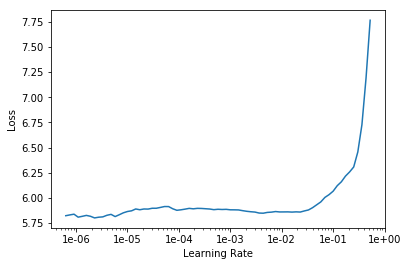

In [44]:
learn50.recorder.plot()

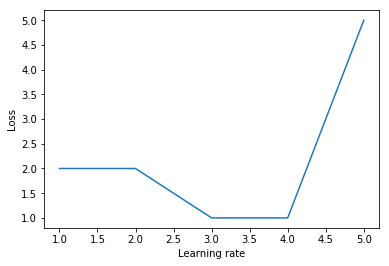

In [45]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5]
y = [2, 2, 1, 1, 5]
plt.plot(x, y)
plt.xlabel('Learning rate')
plt.ylabel('Loss')
None

**Question:** Should I just `slice` that *dip* part?

In [46]:
learn50.fit_one_cycle(5, max_lr=slice(1e-06, 1e-01))

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: 